# Statistical Quality Control Report

This report evaluates the process stability based on service startup time samples using various control charts such as 
- x̄
- R  
- Individuals
- Moving Average
- Moving Range
- CUSUM
- EWMA

The dataset used is collected from simulated observations, each consisting of 5 measurements per sample.

## Data Description

The dataset consists of 25 samples (rows) with 5 observations (Obs_1 to Obs_5) each. Additionally, each row includes pre-calculated values: Sample Mean (`Sample_Mean`) and Sample Range (`Sample_Range`). These will be used to construct x̄ and R control charts respectively.



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


file_path = "SureVerisi.xlsx" 
df = pd.read_excel(file_path)


df.head()


,Obs_1,Obs_2,Obs_3,Obs_4,Obs_5,Sample_Mean,Sample_Range
0,3149,2959,3194,3457,2930,3137.8,527
1,2930,3474,3230,2859,3163,3131.2,615
2,2861,2860,3073,2426,2483,2740.6,647
3,2831,2696,3094,2728,2576,2785.0,518
4,3440,2932,3020,2573,2837,2960.4,867


In [ ]:


# Ortalama ve ortalama range
x_bar_bar = df["Sample_Mean"].mean()
r_bar = df["Sample_Range"].mean()

# Sabitler (n = 5 için)
A2 = 0.577
D3 = 0
D4 = 2.114

# Kontrol sınırları
UCL_x = x_bar_bar + A2 * r_bar
LCL_x = x_bar_bar - A2 * r_bar

UCL_r = D4 * r_bar
LCL_r = D3 * r_bar


## x̄-R Control Chart Analysis

The x̄ chart monitors the variation in sample means, while the R chart tracks within-sample range. A2, D3, and D4 constants are used based on a sample size of 5. 

If any sample mean or range exceeds the control limits, it may indicate an assignable cause. In such case, those samples are excluded, and the control limits are recalculated.


### 📈 x̄ Control Chart

The x̄ control chart is used to monitor the **average of sample groups** over time. It helps detect shifts in the process mean.

For a sample size of \( n = 5 \), the control limits are calculated as follows:

- **Center Line (CL):**

\[
\bar{\bar{X}} = \frac{1}{k} \sum_{i=1}^{k} \bar{X}_i
\]

- **Upper and Lower Control Limits:**

\[
UCL = \bar{\bar{X}} + A_2 \cdot \bar{R} \quad , \quad LCL = \bar{\bar{X}} - A_2 \cdot \bar{R}
\]

Where:
- \( A_2 = 0.577 \) for \( n = 5 \)
- \( \bar{R} \) is the average range of the samples

This chart provides a visual indication of whether the process mean stays within expected variation limits.


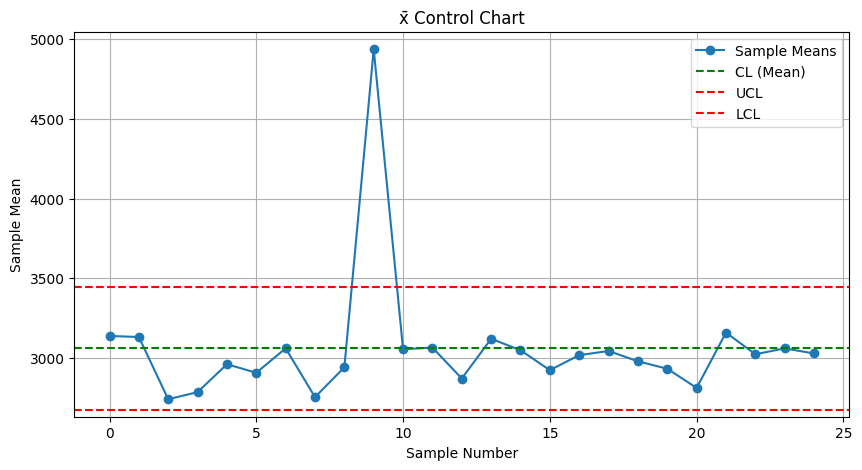

In [28]:
#x̄ Chart
plt.figure(figsize=(10, 5))
plt.plot(df["Sample_Mean"], marker='o', label='Sample Means')
plt.axhline(y=x_bar_bar, color='green', linestyle='--', label='CL (Mean)')
plt.axhline(y=UCL_x, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_x, color='red', linestyle='--', label='LCL')
plt.title('x̄ Control Chart')
plt.xlabel('Sample Number')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.show()


### 📉 R Control Chart

The R control chart is used to monitor the **variation within each sample** by plotting the **range** (maximum – minimum) of observations in a sample group. It helps identify unusual changes in process variability.

For a sample size of \( n = 5 \), the control limits are calculated as:

- **Center Line (CL):**

\[
\bar{R} = \frac{1}{k} \sum_{i=1}^{k} R_i
\]

- **Upper and Lower Control Limits:**

\[
UCL = D_4 \cdot \bar{R} \quad , \quad LCL = D_3 \cdot \bar{R}
\]

Where:
- \( D_3 = 0 \), \( D_4 = 2.114 \) for \( n = 5 \)
- \( \bar{R} \) is the average of the sample ranges

This chart helps to detect any significant increase or decrease in the internal spread of the process.


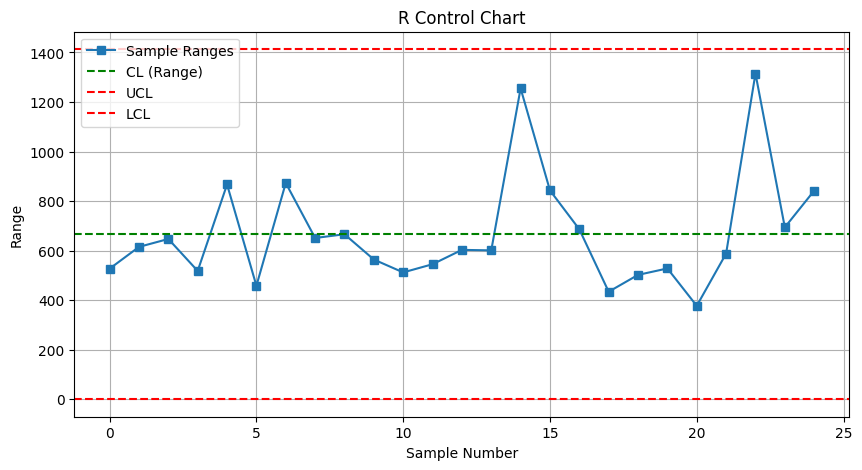

In [29]:
#R chart
plt.figure(figsize=(10, 5))
plt.plot(df["Sample_Range"], marker='s', label='Sample Ranges')
plt.axhline(y=r_bar, color='green', linestyle='--', label='CL (Range)')
plt.axhline(y=UCL_r, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_r, color='red', linestyle='--', label='LCL')
plt.title('R Control Chart')
plt.xlabel('Sample Number')
plt.ylabel('Range')
plt.legend()
plt.grid(True)
plt.show()


### 🔎 Interpretation: x̄ vs R Chart

Upon reviewing the control charts, we observe that:

- **Sample 10** (index 9) **exceeds the control limits in the x̄ chart**, indicating that the process average at this point deviated significantly from the expected range.
- However, this same sample is **within the control limits in the R chart**, suggesting that the variation within that sample is consistent with the rest of the process.

This discrepancy implies that a **shift in the process average** occurred, **without a corresponding increase in variation**. In such cases, the likely cause is **assignable** — possibly due to a temporary change in machinery settings, operator behavior, or environmental conditions affecting the mean.

🚩 **Action**: Sample 10 should be investigated, and if confirmed as an assignable cause, it may be excluded from the calculation of revised control limits.


In [32]:
import matplotlib.pyplot as plt

# Kontrol dışı örneklemi kaldır (index 9)
df_clean = df.drop(index=9)

# Yeni ortalama ve range
x_bar_bar_clean = df_clean["Sample_Mean"].mean()
r_bar_clean = df_clean["Sample_Range"].mean()

# Sabitler (n = 5 için)
A2 = 0.577
D3 = 0
D4 = 2.114

# Yeni kontrol sınırları
UCL_x_clean = x_bar_bar_clean + A2 * r_bar_clean
LCL_x_clean = x_bar_bar_clean - A2 * r_bar_clean

UCL_r_clean = D4 * r_bar_clean
LCL_r_clean = D3 * r_bar_clean


### 🔄 Revised Control Charts After Removing Out-of-Control Sample

After identifying **Sample 10** as an out-of-control point in the x̄ chart, we excluded it from the dataset and recalculated the control limits using only the stable (in-control) samples.

This recalibration provides a more accurate representation of the process behavior under normal conditions.

- The **revised x̄ chart** reflects a tighter control around the process mean.
- The **R chart**, which showed no out-of-control signals initially, remains consistent with slightly updated control limits.

This step demonstrates the importance of iterative refinement in statistical quality control: by filtering out known disturbances (assignable causes), we gain a clearer view of the underlying process stability.


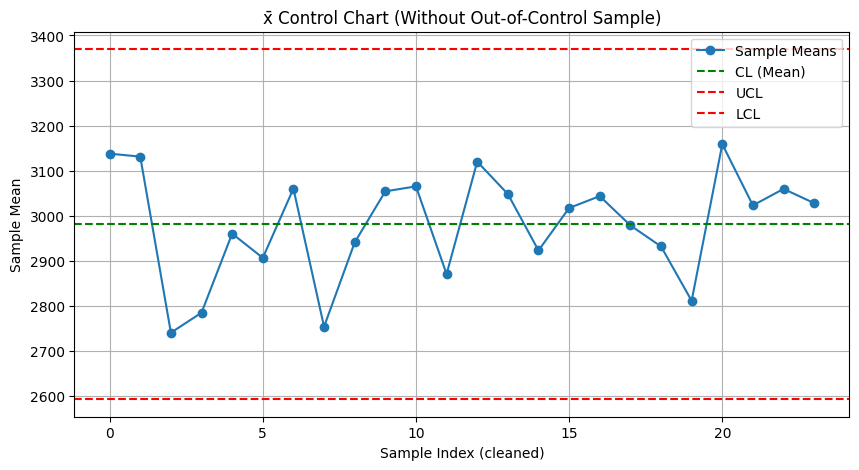

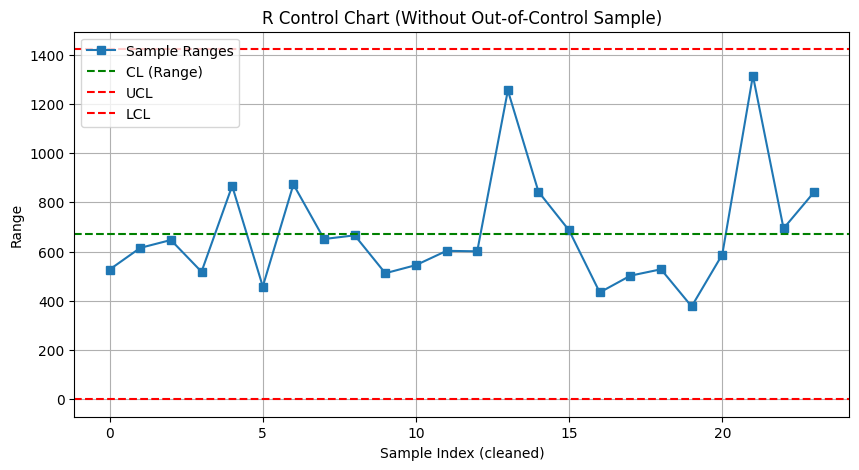

In [27]:

# Temiz x̄ Chart
plt.figure(figsize=(10, 5))
plt.plot(df_clean["Sample_Mean"].values, marker='o', label='Sample Means')
plt.axhline(y=x_bar_bar_clean, color='green', linestyle='--', label='CL (Mean)')
plt.axhline(y=UCL_x_clean, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_x_clean, color='red', linestyle='--', label='LCL')
plt.title('x̄ Control Chart (Without Out-of-Control Sample)')
plt.xlabel('Sample Index (cleaned)')
plt.ylabel('Sample Mean')
plt.legend()
plt.grid(True)
plt.show()

# Temiz R Chart
plt.figure(figsize=(10, 5))
plt.plot(df_clean["Sample_Range"].values, marker='s', label='Sample Ranges')
plt.axhline(y=r_bar_clean, color='green', linestyle='--', label='CL (Range)')
plt.axhline(y=UCL_r_clean, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_r_clean, color='red', linestyle='--', label='LCL')
plt.title('R Control Chart (Without Out-of-Control Sample)')
plt.xlabel('Sample Index (cleaned)')
plt.ylabel('Range')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Tüm gözlemleri birleştir
observations = df[["Obs_1", "Obs_2", "Obs_3", "Obs_4", "Obs_5"]].values.flatten()

# Ortalama ve Moving Range (birbirini izleyen farkların mutlak değeri)
mean_I = np.mean(observations)
moving_ranges = np.abs(np.diff(observations))
MR_bar = np.mean(moving_ranges)

# Sabit (n=2 için d2)
d2 = 1.128

# Kontrol sınırları
UCL_I = mean_I + 3 * (MR_bar / d2)
LCL_I = mean_I - 3 * (MR_bar / d2)


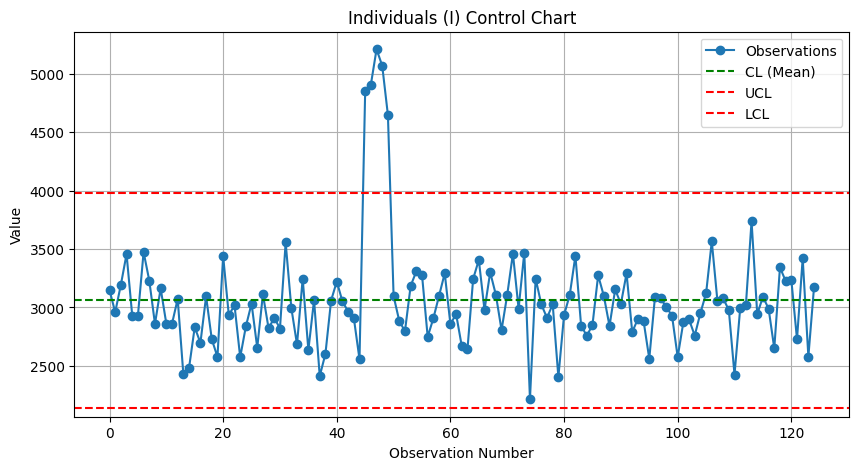

In [13]:

# Individual Chart
plt.figure(figsize=(10, 5))
plt.plot(observations, marker='o', label='Observations')
plt.axhline(y=mean_I, color='green', linestyle='--', label='CL (Mean)')
plt.axhline(y=UCL_I, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_I, color='red', linestyle='--', label='LCL')
plt.title('Individuals (I) Control Chart')
plt.xlabel('Observation Number')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



In [14]:
# Tüm gözlemleri düz bir vektör haline getir
observations = df[["Obs_1", "Obs_2", "Obs_3", "Obs_4", "Obs_5"]].values.flatten()

# Pencere boyutu (örnek: 5)
k = 5
moving_averages = pd.Series(observations).rolling(window=k).mean().dropna()

# Ortalama ve standart sapma
mean_MA = moving_averages.mean()
std_MA = moving_averages.std()

# Kontrol sınırları
UCL_MA = mean_MA + 3 * std_MA
LCL_MA = mean_MA - 3 * std_MA


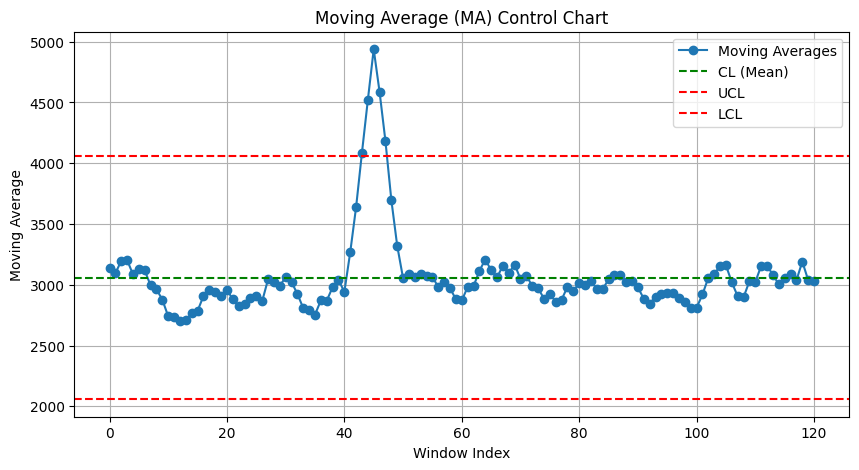

In [15]:

# 4. Moving Average Chart
plt.figure(figsize=(10, 5))
plt.plot(moving_averages.values, marker='o', label='Moving Averages')
plt.axhline(y=mean_MA, color='green', linestyle='--', label='CL (Mean)')
plt.axhline(y=UCL_MA, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_MA, color='red', linestyle='--', label='LCL')
plt.title('Moving Average (MA) Control Chart')
plt.xlabel('Window Index')
plt.ylabel('Moving Average')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Tüm gözlemleri düz bir liste haline getir
observations = df[["Obs_1", "Obs_2", "Obs_3", "Obs_4", "Obs_5"]].values.flatten()

# Moving Ranges: |x_i - x_{i-1}|
moving_ranges = np.abs(np.diff(observations))
MR_bar = moving_ranges.mean()

# Sabit d2 (n=2 için)
d2 = 1.128

# Kontrol sınırları
UCL_MR = MR_bar + 3 * (MR_bar / d2)
LCL_MR = max(0, MR_bar - 3 * (MR_bar / d2))


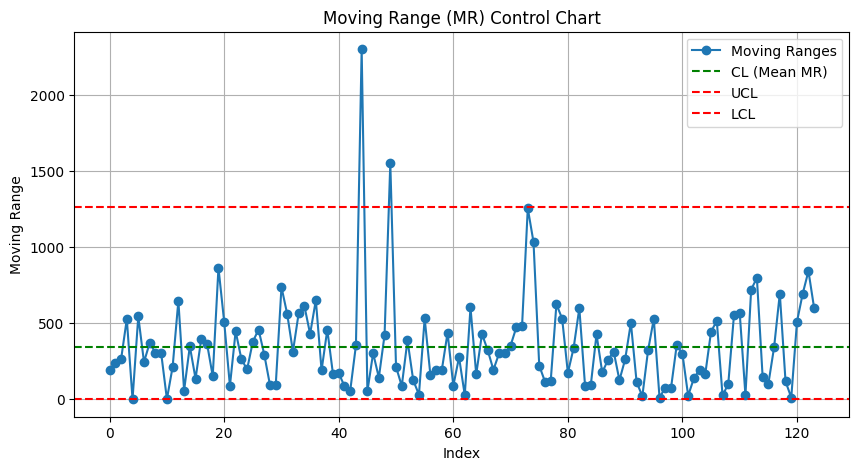

In [17]:

#Moving Range Chart
plt.figure(figsize=(10, 5))
plt.plot(moving_ranges, marker='o', label='Moving Ranges')
plt.axhline(y=MR_bar, color='green', linestyle='--', label='CL (Mean MR)')
plt.axhline(y=UCL_MR, color='red', linestyle='--', label='UCL')
plt.axhline(y=LCL_MR, color='red', linestyle='--', label='LCL')
plt.title('Moving Range (MR) Control Chart')
plt.xlabel('Index')
plt.ylabel('Moving Range')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Lambda parametresi (0.2 tipik bir değerdir)
lmbda = 0.2
ewma = []
ewma.append(observations[0])  # İlk değer

# EWMA hesaplama
for i in range(1, len(observations)):
    ewma.append(lmbda * observations[i] + (1 - lmbda) * ewma[i-1])

# Ortalama ve standart sapma
mu = np.mean(observations)
sigma = np.std(observations)

# Dinamik kontrol sınırları
n = len(observations)
UCL_ewma = [mu + 3 * sigma * np.sqrt((lmbda / (2 - lmbda)) * (1 - (1 - lmbda)**(2 * (i+1)))) for i in range(n)]
LCL_ewma = [mu - 3 * sigma * np.sqrt((lmbda / (2 - lmbda)) * (1 - (1 - lmbda)**(2 * (i+1)))) for i in range(n)]


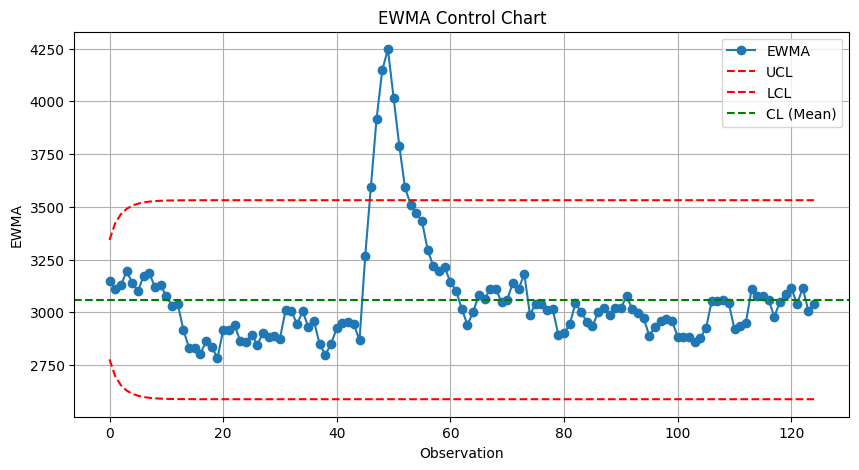

In [19]:

# EWMA Chart
plt.figure(figsize=(10, 5))
plt.plot(ewma, marker='o', label='EWMA')
plt.plot(UCL_ewma, color='red', linestyle='--', label='UCL')
plt.plot(LCL_ewma, color='red', linestyle='--', label='LCL')
plt.axhline(y=mu, color='green', linestyle='--', label='CL (Mean)')
plt.title('EWMA Control Chart')
plt.xlabel('Observation')
plt.ylabel('EWMA')
plt.legend()
plt.grid(True)
plt.show()



In [21]:
# Ortalama
target = np.mean(observations)

# Kümülatif sapma hesaplamaları
cusum_pos = [0]
cusum_neg = [0]
K = 0.5  # Tolerans faktörü
H = 5    # Eşik değer

for x in observations:
    s_pos = max(0, cusum_pos[-1] + (x - target - K))
    s_neg = min(0, cusum_neg[-1] + (x - target + K))
    cusum_pos.append(s_pos)
    cusum_neg.append(s_neg)


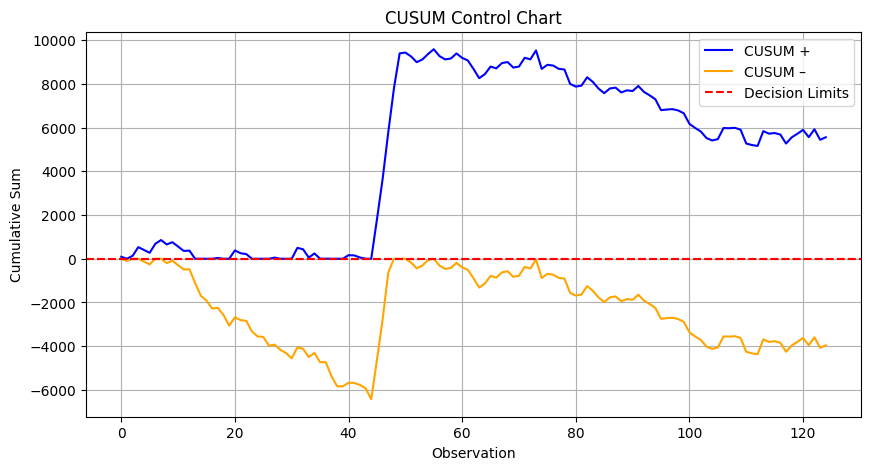

In [22]:

# CUSUM Chart
plt.figure(figsize=(10, 5))
plt.plot(cusum_pos[1:], color='blue', label='CUSUM +')
plt.plot(cusum_neg[1:], color='orange', label='CUSUM –')
plt.axhline(y=H, color='red', linestyle='--', label='Decision Limits')
plt.axhline(y=-H, color='red', linestyle='--')
plt.title('CUSUM Control Chart')
plt.xlabel('Observation')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.grid(True)
plt.show()

